In [2]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

## Working with dataset

Read in the file to a df. I am using a csv below.

In [4]:
df = pd.read_csv('/Users/jthompson/dev/DataZCW-Final-Project/Dashboard/twitter_sample_data.csv', index_col=0)

df.columns


Index(['time_stamp', 'text', 'location', 'state', 'score', 'sentiment'], dtype='object')

In [13]:
df

,time_stamp,text,location,state,score,sentiment
name,,,,,,
0,2020-5-9,Yikes! #COVID19 effect on unemployment figures...,Alaska,AK,1,Positive
1,2020-5-9,One of the most common questions that we are g...,Alabama,AL,0,Nuetral
2,2020-5-9,RT @BvilleDailyNews: Missourians made nearly 5...,Arkansas,AR,1,Positive
3,2020-5-9,"Missourians made nearly 55,000 new unemploymen...",American Samoa,AS,-1,Negative
4,2020-5-9,"Missourians made nearly 55,000 new unemploymen...",Arizona,AZ,0,Nuetral
5,2020-5-9,Yikes! #COVID19 effect on unemployment figures...,California,CA,1,Positive
6,2020-5-9,One of the most common questions that we are g...,Colorado,CO,1,Positive
7,2020-5-9,RT @BvilleDailyNews: Missourians made nearly 5...,Connecticut,CT,1,Positive
8,2020-5-9,"Missourians made nearly 55,000 new unemploymen...",District of Columbia,DC,0,Nuetral


In [5]:
df.dtypes

time_stamp    object
text          object
location      object
state         object
score          int64
sentiment     object
dtype: object

In [6]:
df['text']

name
0     Yikes! #COVID19 effect on unemployment figures...
1     One of the most common questions that we are g...
2     RT @BvilleDailyNews: Missourians made nearly 5...
3     Missourians made nearly 55,000 new unemploymen...
4     Missourians made nearly 55,000 new unemploymen...
5     Yikes! #COVID19 effect on unemployment figures...
6     One of the most common questions that we are g...
7     RT @BvilleDailyNews: Missourians made nearly 5...
8     Missourians made nearly 55,000 new unemploymen...
9     Missourians made nearly 55,000 new unemploymen...
10    @MollyJongFast We’ll consider her a #COVID19va...
11    RT @aspiesmom: You choose: risk #Coronavirus O...
12    ICMR teams up with Bharat Biotech to develop i...
13    @LadyRedWave People refusing the #COVID19vacci...
14    @eliasamare @eliasamare thats actually a bless...
15    "#Polio spread fastest in warm months. Each Ju...
16    How Patent Abuse Could Hurt the Fight Against ...
17    Israels IIBR finds antibody that neut

### Adding only the data from the 'tweet' column to the be including in the word cloud

In [17]:
all_tweets = ' '.join(df['text'].str.lower())
print(all_tweets)

yikes! #covid19 effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad… https://t.co/uzufok53i6 one of the most common questions that we are getting is how to answer interview questions about being laid off/furl… https://t.co/3dz8cremry rt @bvilledailynews: missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to ne… missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to… https://t.co/4e3uncexjn missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to… https://t.co/6rjf2dyp0y yikes! #covid19 effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad… https://t.co/uzufok53i6 one of the most common questions that we are getting is how to answer interview questions about being laid off/furl… https://t.co/3dz8cremry rt @bvilledaily

### Tweets contained links, used regex to remove

In [19]:
import re

# remove links
cleaned_tweets = re.sub(r'http\S+', '', all_tweets)

In [20]:
#remove #hashtags
cleaned_tweets = re.sub(r"#(\w+)", ' ', cleaned_tweets, flags=re.MULTILINE)

In [21]:
# remove @
cleaned_tweets = re.sub(r"@(\w+)", ' ', cleaned_tweets, flags=re.MULTILINE)

In [38]:
# remove :
cleaned_tweets = re.sub(r" : (\w+)", ' ', cleaned_tweets, flags=re.MULTILINE)

In [39]:
cleaned_tweets


'yikes!   effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad…  one of the most common questions that we are getting is how to answer interview questions about being laid off/furl…  rt   made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to ne… missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to…  missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to…  yikes!   effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad…  one of the most common questions that we are getting is how to answer interview questions about being laid off/furl…  rt   made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to ne… missourians made nearly 55,000 new unemployment claims in the past week, increasi

Verify removal

In [23]:
print(cleaned_tweets)

yikes!   effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad…  one of the most common questions that we are getting is how to answer interview questions about being laid off/furl…  rt  : missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to ne… missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to…  missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to…  yikes!   effect on unemployment figures=ill wind that blows nobody any good. many unemployed havent been ad…  one of the most common questions that we are getting is how to answer interview questions about being laid off/furl…  rt  : missourians made nearly 55,000 new unemployment claims in the past week, increasing total claims since mid-march to ne… missourians made nearly 55,000 new unemployment claims i

### Removing unwanted words

Removing stop words, and additional words

In [40]:
# all_tweets = ' '.join(df['tweet'].str.lower())

stopwords = list(STOPWORDS) + ["made", "now", "rt", 'to', 'say', 'sort', 'right', 'now', 'will', 'be', 'is', 'highly']

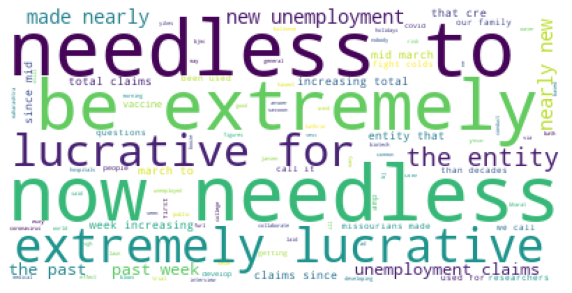

In [41]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(cleaned_tweets)
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### We also plan to add a bar chart to our project  

### Filter out top words

Confirming the top words are being filtered using the `Counter` function and plotting them as a bar chart.

In [43]:
filtered_words = [word for word in cleaned_tweets.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# print(filtered_words)
df = pd.DataFrame(list(zip(words, counts)), 
               columns =['word', 'count']) 

In [44]:
df

,word,count
0,claims,12
1,unemployment,8
2,now.,7
3,needless,7
4,extremely,7
5,lucrative,7
6,entity,7
7,nearly,6
8,"55,000",6
9,new,6


In [52]:
most_occuring = df.nlargest(1, ['count']) 

In [60]:
m_o = most_occuring['word'].item()

To who what the most occuring word in the dashboard, use the above code...

In [62]:
m_o

'claims'

### Plotting Bar Chart

<BarContainer object of 10 artists>

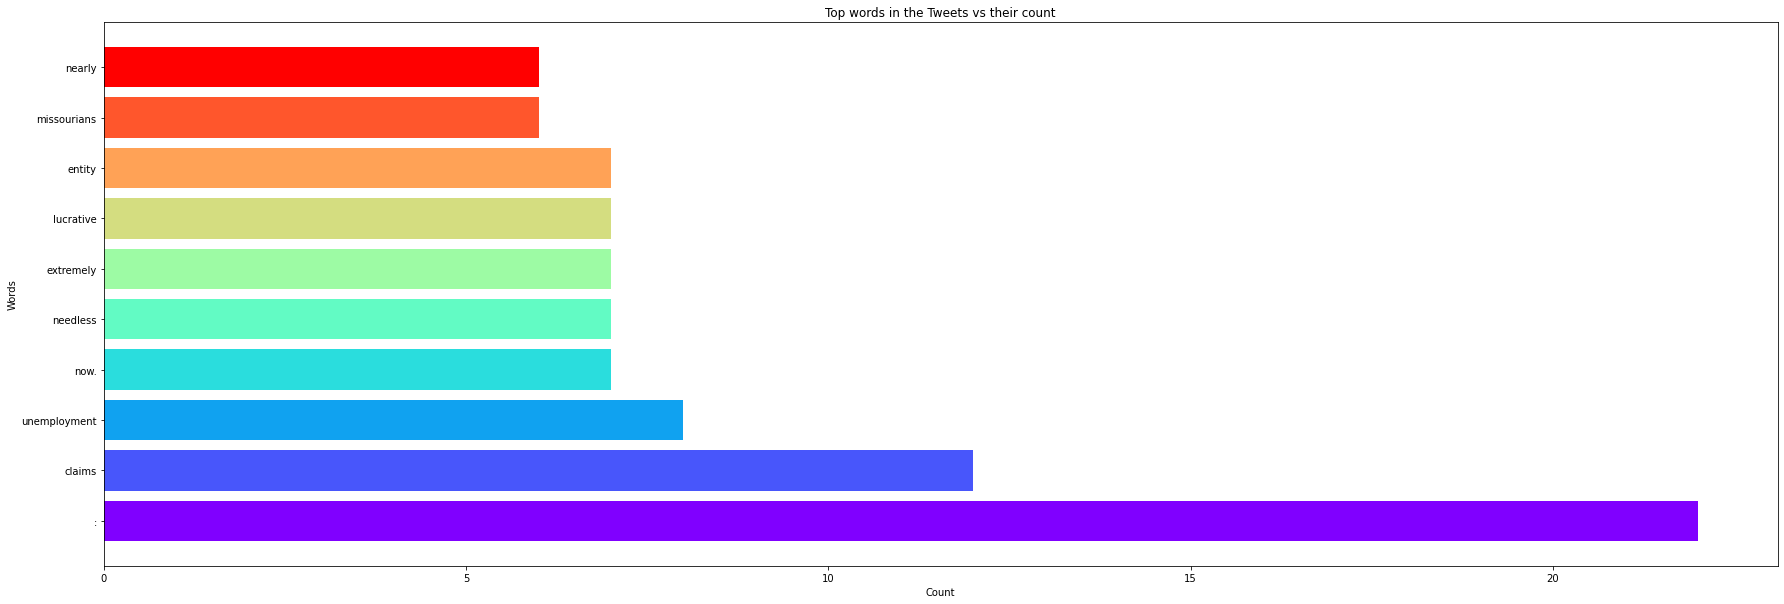

In [30]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 30, 10

plt.title('Top words in the Tweets vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)